In [2]:
import pandas as pd
from neuralprophet import NeuralProphet, set_log_level

# 导入依赖
import warnings

warnings.filterwarnings("ignore")

# Disable logging messages unless there is an error
set_log_level("ERROR")

Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.


NeuralProphet 确实支持多种将不确定性纳入预测的方法

从前面教程中的 NeuralProphet 基础模型开始

In [5]:
# Load the dataset for tutorial 4 with the extra temperature column
df = pd.read_csv("/home/ann/opt/iNeuralProphet/data/tutorial01.csv")
df.head()

,ds,y
0,2014-12-31,65.41
1,2015-01-01,62.09
2,2015-01-02,69.44
3,2015-01-03,65.22
4,2015-01-04,58.91


Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr:   0%|          | 0/229 [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

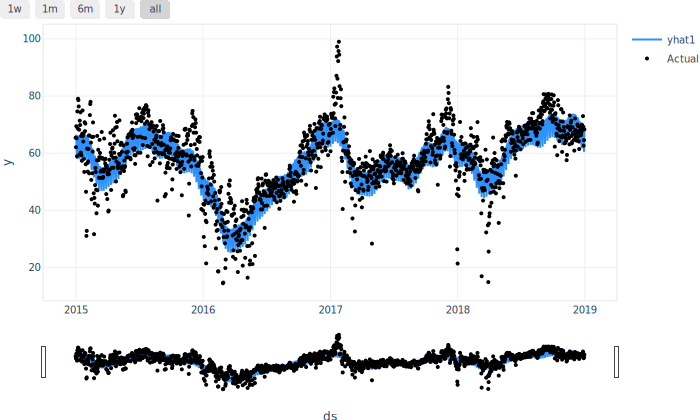

In [6]:
# Model and prediction
m = NeuralProphet()
m.set_plotting_backend("plotly-static")
metrics = m.fit(df)
forecast = m.predict(df)
m.plot(forecast)

与点预测相比，不确定性建模预测预测的可能值区间。假设我们希望真实值在估计区间内，概率为 90%，我们将置信水平设置为 0.9。我们定义了两个分位数，0.05 和 0.95，它们对应于预测分布的第 5 个和第 95 个百分位数。90% 置信区间是第 5 个百分位数和第 95 个百分位数之间的差值。先使用默认模型进行训练

In [ ]:
confidence_level = 0.9

boundaries = round((1 - confidence_level) / 2, 2)
# NeuralProphet only accepts quantiles value in between 0 and 1
quantiles = [boundaries, confidence_level + boundaries]
quantiles

使用第 10 个和第 90 个百分位数设置具有不确定性的模型

Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr:   0%|          | 0/229 [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

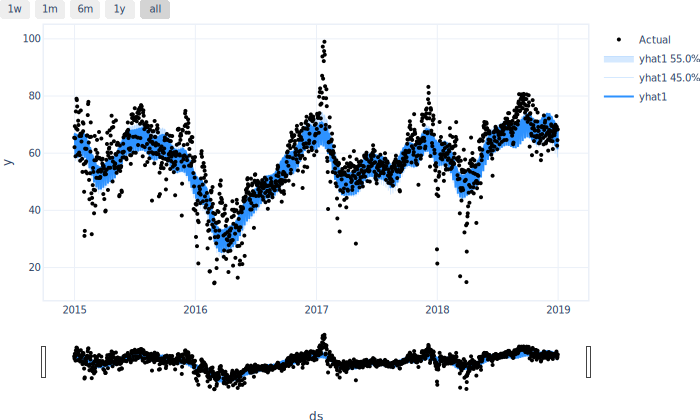

In [13]:
m = NeuralProphet(quantiles=quantiles)
m.set_plotting_backend("plotly-static")

metrics = m.fit(df)
forecast = m.predict(df)
m.plot(forecast)

对于上述方法，我们使用了分位数回归模型，该模型使用弹球损失函数来评估拟合优度。虽然在训练日期保证了定义的覆盖范围，但不能保证未见过的数据。更复杂的方法（如共形预测）可用于保证对未可见数据的边际覆盖率

Predicting: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

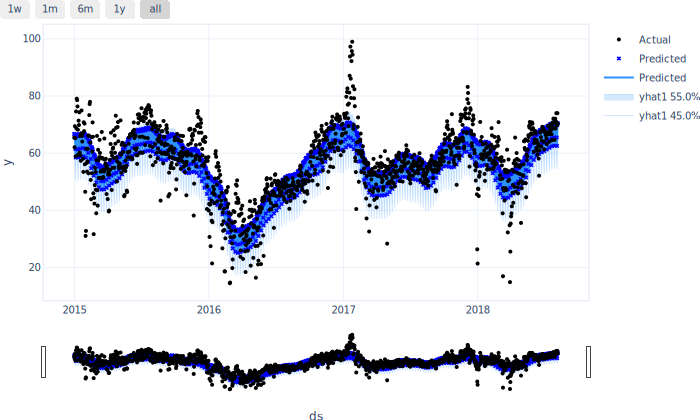

In [14]:
# evaluate uncertainy on calibration set
train_df, cal_df = m.split_df(df, valid_p=0.1)
method = "naive"  # or "cqr" for a more sophisticated method, see uncertainty tutorial
conformal_forecast = m.conformal_predict(train_df, cal_df, alpha=0.1, method=method)
m.highlight_nth_step_ahead_of_each_forecast(1).plot(conformal_forecast)

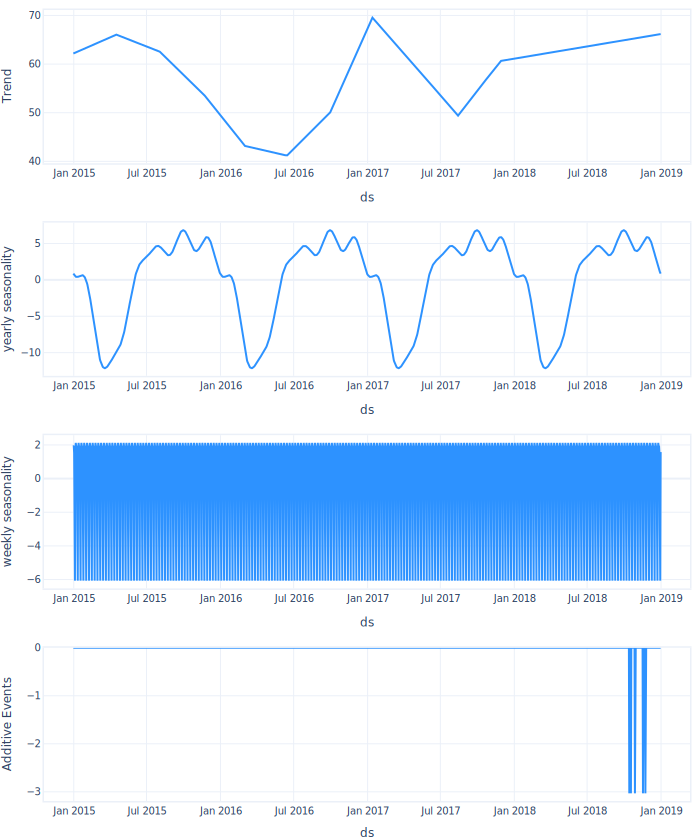

In [7]:
m.plot_components(forecast)

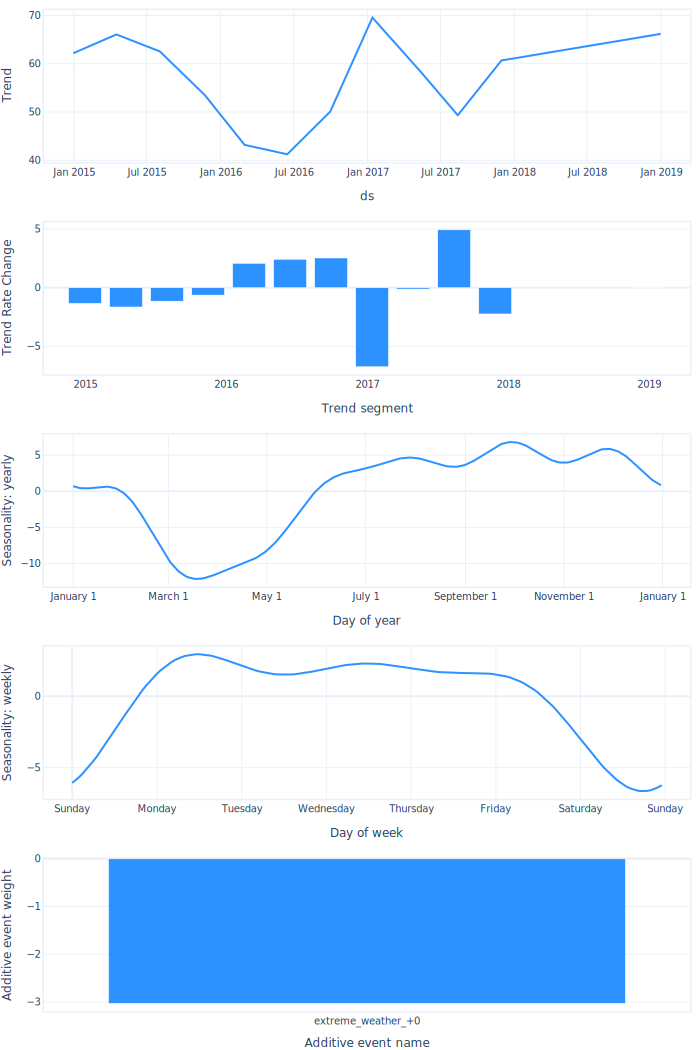

In [8]:
m.plot_parameters()